### Importing libraries & functions





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

### Importing dataset

In [2]:
dataset=pd.read_csv("a_Dataset_CreditScoring.csv")

### Data preparation

In [3]:
# shows count of rows and columns
dataset.shape

(3000, 30)

In [4]:
#dropping customer ID column from the dataset
dataset=dataset.drop('ID',axis=1)
dataset.shape

(3000, 29)

In [5]:
# explore missing values
dataset.isna().sum()

TARGET               0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

In [6]:
# filling missing values with mean
dataset=dataset.fillna(dataset.mean())

In [7]:
# explore missing values post missing value fix
dataset.isna().sum()

TARGET              0
DerogCnt            0
CollectCnt          0
BanruptcyInd        0
InqCnt06            0
InqTimeLast         0
InqFinanceCnt24     0
TLTimeFirst         0
TLTimeLast          0
TLCnt03             0
TLCnt12             0
TLCnt24             0
TLCnt               0
TLSum              40
TLMaxSum           40
TLSatCnt            0
TLDel60Cnt          0
TLBadCnt24          0
TL75UtilCnt         0
TL50UtilCnt         0
TLBalHCPct         41
TLSatPct            4
TLDel3060Cnt24      0
TLDel90Cnt24        0
TLDel60CntAll       0
TLOpenPct           3
TLBadDerogCnt       0
TLDel60Cnt24        0
TLOpen24Pct         3
dtype: int64

In [8]:
#shows first few rows of the code
dataset.dropna(inplace=True)

In [9]:
dataset.TLSum = dataset.TLSum.str.replace(',', '').str.replace('$', '').astype(int)
dataset.TLMaxSum = dataset.TLMaxSum.str.replace(',', '').str.replace('$', '').astype(int)
dataset.TLBalHCPct = dataset.TLBalHCPct.str.replace('%', '').astype(int)
dataset.TLSatPct= dataset.TLSatPct.str.replace('%', '').astype(int)
dataset.TLOpenPct= dataset.TLOpenPct.str.replace('%', '').astype(int)
dataset.TLOpen24Pct= dataset.TLOpen24Pct.str.replace('%', '').astype(int)

<ipython-input-9-f9685614b597>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  dataset.TLSum = dataset.TLSum.str.replace(',', '').str.replace('$', '').astype(int)
<ipython-input-9-f9685614b597>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  dataset.TLMaxSum = dataset.TLMaxSum.str.replace(',', '').str.replace('$', '').astype(int)


In [10]:
# # count of good loans (0) and bad loans (1)
# dataset['TARGET'].value_counts()

In [11]:
# # data summary across 0 & 1
# dataset.groupby('TARGET').mean()

### Train Test Split

In [12]:
y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:29].values

In [13]:
# splitting dataset into training and test (in ratio 80:20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train.shape

(2364, 28)

In [15]:
# Exporting Normalisation Coefficients for later use in prediction
import joblib
joblib.dump(sc, 'f2_Normalisation_CreditScoring')

['f2_Normalisation_CreditScoring']

### Risk Model building

In [16]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(28, input_shape=(28,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
74/74 [==============================] - 2s 4ms/step - loss: 0.4748 - accuracy: 0.8316
Epoch 2/10
74/74 [==============================] - 0s 3ms/step - loss: 0.4083 - accuracy: 0.8346
Epoch 3/10
74/74 [==============================] - 0s 4ms/step - loss: 0.3907 - accuracy: 0.8350
Epoch 4/10
74/74 [==============================] - 0s 3ms/step - loss: 0.3810 - accuracy: 0.8367
Epoch 5/10
74/74 [==============================] - 0s 3ms/step - loss: 0.3741 - accuracy: 0.8384
Epoch 6/10
74/74 [==============================] - 0s 3ms/step - loss: 0.3695 - accuracy: 0.8393
Epoch 7/10
74/74 [==============================] - 0s 4ms/step - loss: 0.3650 - accuracy: 0.8414
Epoch 8/10
74/74 [==============================] - 0s 5ms/step - loss: 0.3609 - accuracy: 0.8443
Epoch 9/10
74/74 [==============================] - 0s 4ms/step - loss: 0.3579 - accuracy: 0.8469
Epoch 10/10
74/74 [==============================] - 0s 3ms/step - loss: 0.3550 - accuracy: 0.8490


In [17]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.3711 - accuracy: 0.8409


[0.37112805247306824, 0.8409475684165955]

In [18]:
yp = model.predict(X_test)
yp[:5]

array([[0.38564947],
       [0.07109423],
       [0.324843  ],
       [0.29901543],
       [0.02502668]], dtype=float32)

In [19]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [20]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [26]:
### Model Evaluation

In [21]:
print(accuracy_score(y_test, y_pred))

0.8409475465313029


In [25]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       492
           1       0.60      0.15      0.24        99

    accuracy                           0.84       591
   macro avg       0.73      0.57      0.58       591
weighted avg       0.81      0.84      0.80       591



Text(69.0, 0.5, 'Truth')

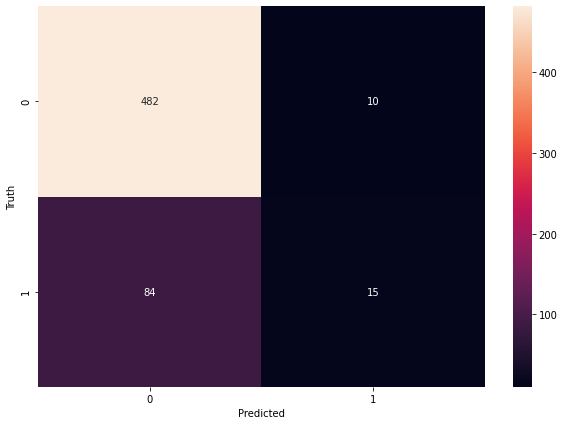

In [23]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')